In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

RANGE = 11

n = np.arange(RANGE)
impulse = np.zeros(RANGE)
impulse[0] = 1
zero_input = np.zeros(RANGE)


## Part A

[ 0.11111111 -0.02222222  0.02666667 -0.00977778  0.00728889 -0.00341333
  0.00214044 -0.00111076  0.00065024 -0.0003522   0.00020049]


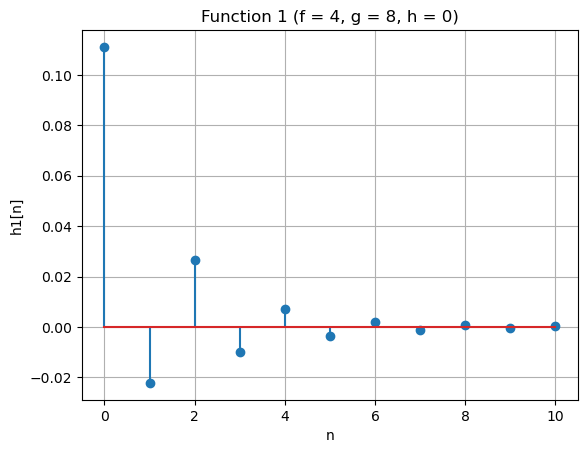

In [20]:
# Part A.1

# I. Function 1
a = [1, 1/5, -1/5]  # FeedBack coefficients
b = [1/9]           # Feed forward coefficients
h1 = signal.lfilter(b, a, impulse)
print(h1)

plt.figure()
plt.stem(n, h1)
plt.xlabel('n')
plt.ylabel('h1[n]')
plt.title('Function 1 (f = 4, g = 8, h = 0)')
plt.grid(True)
plt.show()


[ 1.  0. -1.  0.  1.  0. -1.  0.  1.  0. -1.]


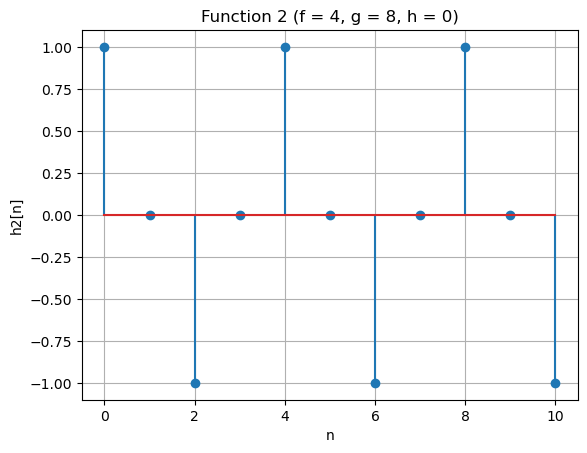

In [21]:
## Part A.2

# II. Function 2
a = [1.0, 0, 1.0]  # FeedBack coefficients
b = [1.0]           # Feed forward coefficients
h2 = signal.lfilter(b, a, impulse)
print(h2)

plt.figure()
plt.stem(n, h2)
plt.xlabel('n')
plt.ylabel('h2[n]')
plt.title('Function 2 (f = 4, g = 8, h = 0)')
plt.grid(True)
plt.show()

## Part B

[0.6        0.34       0.196      0.1124     0.06456    0.037064
 0.0212816  0.01221904 0.00701578 0.00402821 0.00231286]


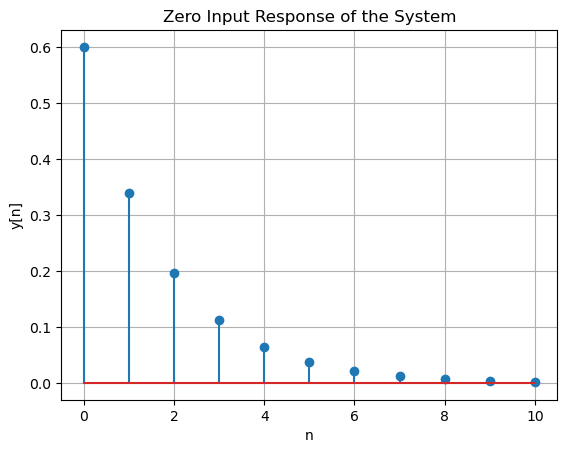

In [22]:
# D = 1

# Feedback Coefficient(s)
a = [1.0, -4/10, -0.1]  # FeedBack coefficients

# Feedforward Coefficient(s)
b = [2.0]           # Feed forward coefficients

y_init = [1.0, 2.0]

zi = signal.lfiltic(b, a, y_init)

y_zir = signal.lfilter(b, a, zero_input, zi=zi)[0]
print(y_zir)

# Plot results
plt.stem(n, y_zir)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Zero Input Response of the System")
plt.grid()
plt.show()



## Part C

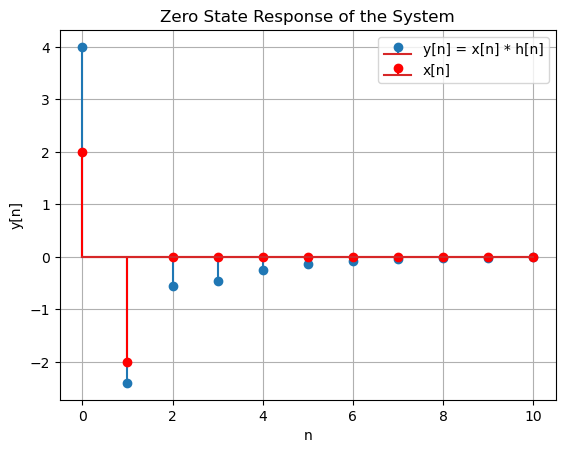

In [23]:

# Input Signal x[n]
x = 2*np.cos((2*np.pi*n)/2) * (n >= 0) * (n < 2)

# Zero State Response of the system
yc_zsr = signal.lfilter(b, a, x)
# print(h_c)


plt.stem(n, yc_zsr, label='y[n] = x[n] * h[n]')
plt.xlabel("n")
plt.ylabel("y[n]")
plt.stem(n, x, 'r', markerfmt='ro', label='x[n]')
plt.title("Zero State Response of the System")
plt.legend()
plt.grid()
plt.show()


## Part D

[ 4.6        -2.06       -0.364      -0.3516     -0.17704    -0.105976
 -0.0600944  -0.03463536 -0.01986358 -0.01140897 -0.00654995]
[ 4.6        -2.06       -0.364      -0.3516     -0.17704    -0.105976
 -0.0600944  -0.03463536 -0.01986358 -0.01140897 -0.00654995]


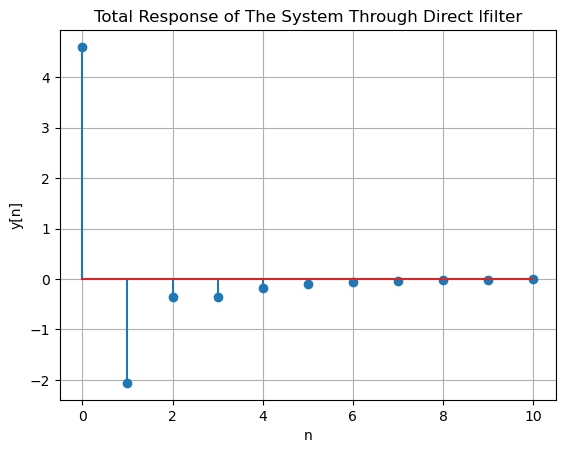

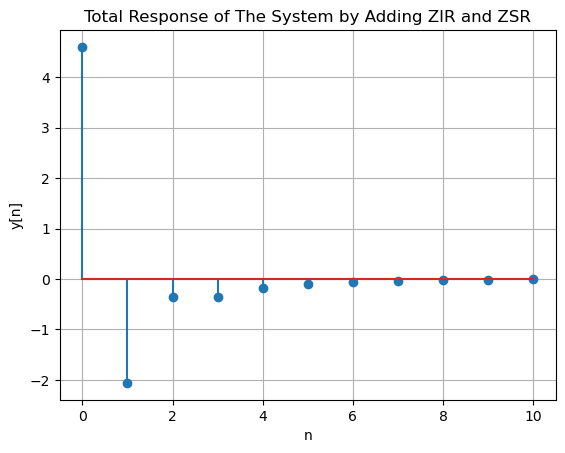

In [24]:
# Input Signal x[n]
x = 2*np.cos((2*np.pi*n)/2) * (n >= 0) * (n < 2)


# Part 1
# Using zi from Part B (initial conditions), as well as a and b for the coefficients
y = signal.lfilter(b, a, x, zi=zi)[0]
print(y)

# part 2
# Adding the zero-input response to the zero-state response
y_total = y_zir + yc_zsr
print(y_total)

plt.figure()
plt.stem(n, y_total)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Total Response of The System Through Direct lfilter")
plt.grid()
plt.show()

plt.figure()
plt.stem(n, y_total)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Total Response of The System by Adding ZIR and ZSR")
plt.grid()
plt.show()


## Part E

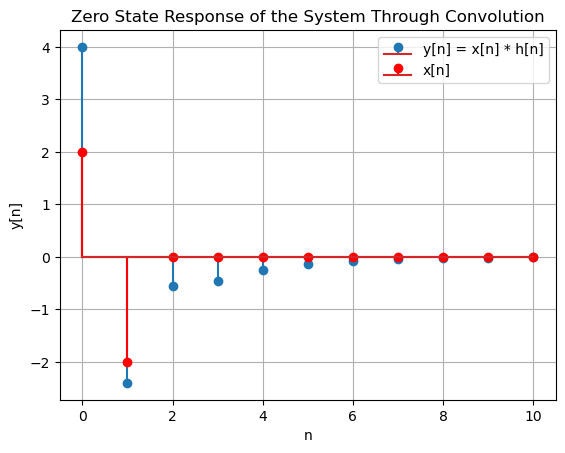

In [25]:

# Input Signal x[n]
x = 2*np.cos((2*np.pi*n)/2) * (n >= 0) * (n < 2)

# Impulse Response of the system
h_c = signal.lfilter(b, a, impulse)
# print(h_c)

# Zero State Response of Part B with x:
y_zsr = np.convolve(x, h_c, mode='full')[:len(n)]
# print(y_conv)

plt.stem(n, y_zsr, label='y[n] = x[n] * h[n]')
plt.xlabel("n")
plt.ylabel("y[n]")
plt.stem(n, x, 'r', markerfmt='ro', label='x[n]')
plt.title("Zero State Response of the System Through Convolution")
plt.legend()
plt.grid()
plt.show()


## Part F

In [26]:
def movingAvg(N):
    # System is FIR, Therefore a = 1
    a = [1] # FeedBack coefficients
    
    # all coefficients are 1/N
    b = np.ones(N)/N # Feed forward coefficients
    return b, a


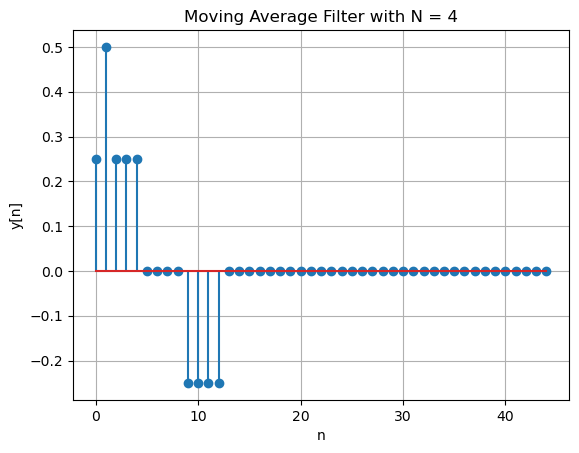

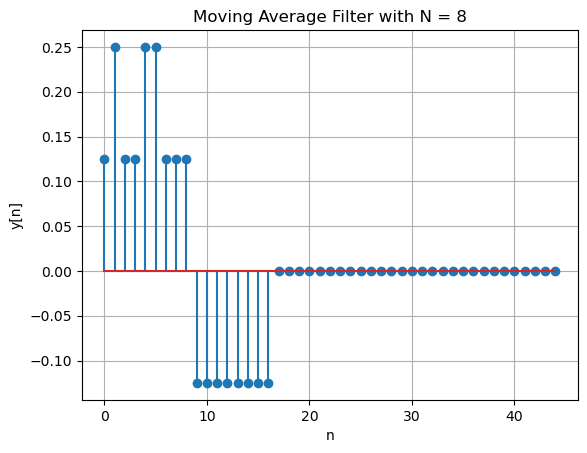

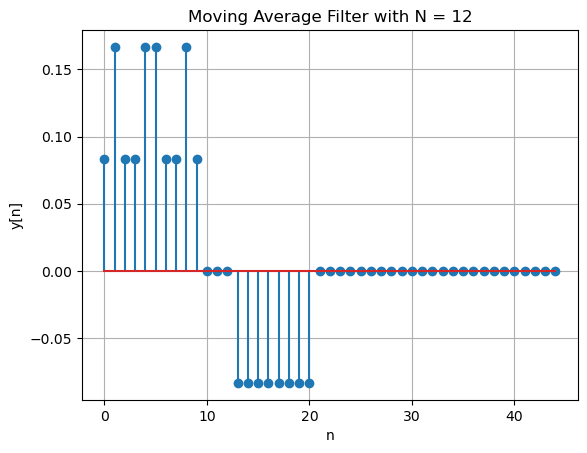

In [27]:
dfunc = lambda n: 1.0 * (n == 0)
n = np.arange(0, 45)

x = np.cos(np.pi * n / 2) - dfunc(n - 9) + dfunc(n - 1)

N_values = [4, 8, 12]

for N in N_values:
    b, a = movingAvg(N)
    y = signal.lfilter(b, a, x)
    plt.stem(n, y)
    plt.xlabel("n")
    plt.ylabel("y[n]")
    plt.title(f"Moving Average Filter with N = {N}")
    plt.grid()
    plt.show()
    
# plt.figure(figsize=(6, 12))

# plt.subplot(4, 1, 1)
# plt.stem(n, x)
# plt.title("Original Signal")


# plt.tight_layout()
# plt.show()